<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Samuel Goldrup> (double-click to edit)
    <Math 345>
    <16 November 2021>

In [2]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as la

### Helper Functions

In [3]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [4]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    image = image.reshape(m,n) #deflatten the image
    plt.imshow(image, cmap="gray") #show it

(-0.5, 179.5, 199.5, -0.5)

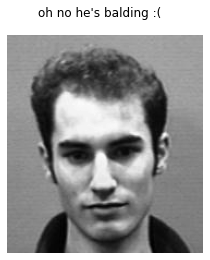

In [5]:
F = get_faces()
show(F[:,59]) #59th column
plt.suptitle("oh no he's balding :(") #say funny stuff
plt.axis("off")

In [6]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces()
        self.mu = np.mean(self.F,axis=1) #sum along rows and divide by no of faces
        self.mu = self.mu.reshape((-1,1)) #reshape into a column vector
        self.Fbar = self.F - self.mu
        self.U, _, _ = la.svd(self.Fbar, full_matrices=False)

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        self.U_s = self.U[:,:s] #get first s columns
        A_hat = self.U_s.T @ A #get projection, 3 lines what ya gonna do about it
        return A_hat 

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        g_hat_s = self.project(g,s)
        F_hat = self.U_s.T @ self.F #this is not behaving like a matrix oops
        
        normed_diffs = [la.norm(F_hat[:,i]-g_hat_s) for i in range(F_hat.shape[1])]
        j = np.argmin(normed_diffs)
        
        return j

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        index_nearest = self.find_nearest(image,s) #get the index of the nearest image
        
        image = image.reshape(m,n) #deflatten it
        nearest_image = self.F[:,index_nearest] #get that column
        nearest_image = nearest_image.reshape(m,n) #deflatten it
        
        plt.subplot(121) #make a subplot with the image and its match
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.subplot(122)
        plt.imshow(nearest_image, cmap="gray")
        plt.axis("off")
        plt.tight_layout()
        plt.show()

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [7]:
F = get_faces()

Text(0.5, 0.98, 'mean shifting')

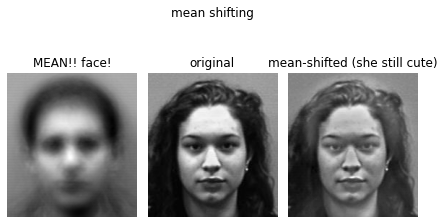

In [8]:
poop = FacialRec() #create the object
plt.subplot(131) #3 by 1 subplot
show(poop.mu)
plt.title("MEAN!! face!") #show the average of all the faces
plt.axis("off") #no numbers on the axes
plt.subplot(132)
show(poop.F[:,15]) #15th column rep of the face graph
plt.title("original")
plt.axis("off")
plt.subplot(133)
show(poop.Fbar[:,15]) #mean shifted same face
plt.title("mean-shifted (she still cute)")
plt.axis("off")

plt.tight_layout() #if i'm gonna go hard in the lab imma make it look sexy
plt.suptitle("mean shifting")

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


Text(0.5, 0.98, 'eigen faces')

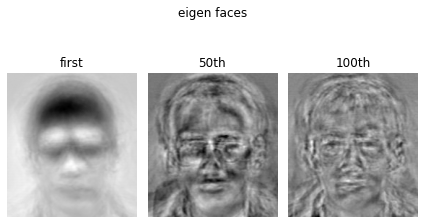

In [9]:
plt.subplot(131)
show(poop.U[:,1]) #the first eigen face
plt.title("first")
plt.axis("off")
plt.subplot(132)
show(poop.U[:,50]) #50th eigen face
plt.title("50th") 
plt.axis("off")
plt.subplot(133)
show(poop.U[:,100])
plt.title("100th") #hunnedth eigen face
plt.axis("off")

plt.tight_layout()
plt.suptitle("eigen faces")

# Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

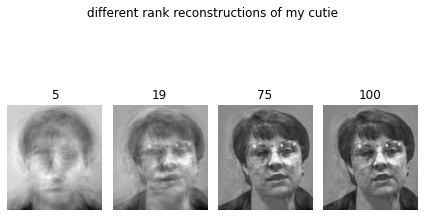

In [11]:
rec = FacialRec()
cutie = rec.F[:,0]
show(cutie)
plt.subplot(141)
cutie_hat_5 = rec.project(cutie,5) #get projection
show(rec.U_s @ cutie_hat_5) #multiply reduced U by the projection to get the s-rank reconstruction
plt.title("5")
plt.axis("off")
plt.subplot(142)
cutie_hat_19 = rec.project(cutie,19) #s=19
show(rec.U_s @ cutie_hat_19)
plt.title("19")
plt.axis("off")
plt.subplot(143)
cutie_hat_75 = rec.project(cutie,75) #s=75
show(rec.U_s @ cutie_hat_75)
plt.title("75")
plt.axis("off")
plt.subplot(144)
cutie_hat_100 = rec.project(cutie,100) #s=100
show(rec.U_s @ cutie_hat_100)
plt.title("100")
plt.axis("off")
plt.suptitle("different rank reconstructions of my cutie")

plt.tight_layout()


### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

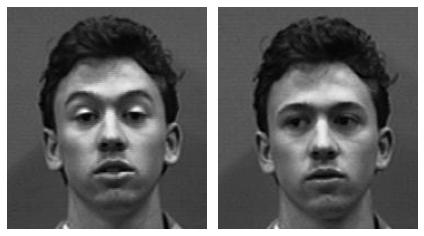

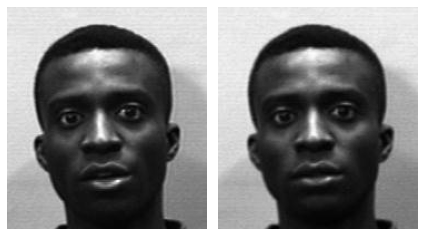

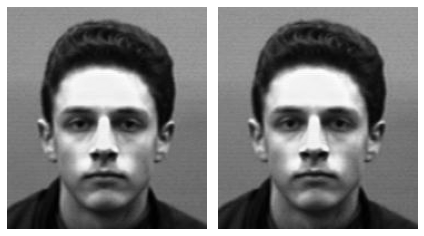

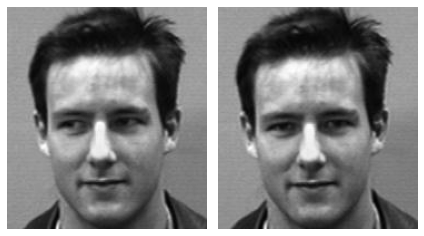

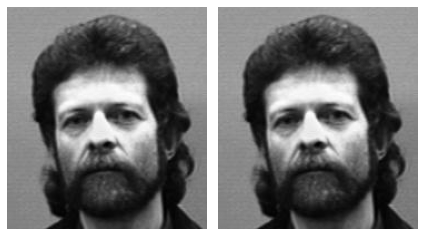

In [12]:
my_faces = FacialRec()
faces = sample_faces(5)
face_lst = [image for image in faces]
for face in face_lst: #iterate through the face list
    my_faces.match(face)
#my_faces.match(face_lst[0])